# Flux Vision Data

In [110]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import seaborn as sns
# sns.set()
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import geoplot as gpl
import json
import mapclassify


%matplotlib inline

In [208]:
# reading the csv file
df = pd.read_csv('data/Zoning Province/Flux_24h.csv',sep = ';')
df = df[(df.Immobility == '3h') & (df.Origin != 'Hors_Zone') & (df.Destination != 'Hors_Zone')]
df

Date        Origin     Destination Immobility  \
1       2020-01-31      Bas-Uele          Tshopo         3h   
3       2020-01-31      Equateur        Kinshasa         3h   
7       2020-01-31  Haut-Katanga  Kasai-Oriental         3h   
10      2020-01-31  Haut-Katanga        Kinshasa         3h   
11      2020-01-31  Haut-Katanga        Kinshasa         3h   
...            ...           ...             ...        ...   
142758  2020-06-29      Sud-Kivu       Nord-Kivu         3h   
142760  2020-06-29    Sud-Ubangi        Kinshasa         3h   
142768  2020-06-29        Tshopo           Ituri         3h   
142770  2020-06-29        Tshopo         Maniema         3h   
142771  2020-06-29        Tshopo         Maniema         3h   

                    Home_Category        Activity_Category Observation_Zone  \
1       Destination_Zone_Resident  Destination_Zone_Worker      ZoneGlobale   
3            Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
7                Outside_Resident           Outside_Worker      ZoneGlobale   
10      Destination_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
11           Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
...                           ...                      ...              ...   
142758       Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
142760        Study_Zone_Resident        Study_Zone_Worker      ZoneGlobale   
142768           Outside_Resident           Outside_Worker      ZoneGlobale   
142770           Outside_Resident           Outside_Worker      ZoneGlobale   
142771       Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   

             Mode  Volume  
1       All_modes     124  
3       All_modes     290  
7       All_modes      51  
10      All_modes      37  
11      All_modes     140  
...           ...     ...  
142758  All_modes   19505  
142760  All_modes     691  
142768  All_modes     202  
142770  All_modes     202  
142771  All_modes     101  

[62006 rows x 9 columns]

In [199]:
list((df.groupby(by = 'Home_Category').groups.keys()))

['Destination_Zone_Resident',
 'Origin_Zone_Resident',
 'Outside_Resident',
 'Study_Zone_Resident']

In [200]:
#consider only 'Date','Origin' and 'Destination'
df = df.groupby(by=['Date','Origin','Destination'], as_index=0).sum()
df

Date        Origin     Destination  Volume
0     2020-01-31      Bas-Uele          Tshopo     124
1     2020-01-31      Equateur        Kinshasa     290
2     2020-01-31  Haut-Katanga  Kasai-Oriental      51
3     2020-01-31  Haut-Katanga        Kinshasa     177
4     2020-01-31  Haut-Katanga         Lualaba    8845
...          ...           ...             ...     ...
9045  2020-06-29      Sud-Kivu         Maniema      24
9046  2020-06-29      Sud-Kivu       Nord-Kivu   63659
9047  2020-06-29    Sud-Ubangi        Kinshasa     691
9048  2020-06-29        Tshopo           Ituri     202
9049  2020-06-29        Tshopo         Maniema     303

[9050 rows x 4 columns]

In [201]:
df.head(5)

Date        Origin     Destination  Volume
0  2020-01-31      Bas-Uele          Tshopo     124
1  2020-01-31      Equateur        Kinshasa     290
2  2020-01-31  Haut-Katanga  Kasai-Oriental      51
3  2020-01-31  Haut-Katanga        Kinshasa     177
4  2020-01-31  Haut-Katanga         Lualaba    8845

In [202]:
df.tail(5)

Date      Origin Destination  Volume
9045  2020-06-29    Sud-Kivu     Maniema      24
9046  2020-06-29    Sud-Kivu   Nord-Kivu   63659
9047  2020-06-29  Sud-Ubangi    Kinshasa     691
9048  2020-06-29      Tshopo       Ituri     202
9049  2020-06-29      Tshopo     Maniema     303

In [215]:
# Date Conversion
df['Date'] = pd.to_datetime(df['Date'])
df['Date_day'] = df['Date'].dt.weekday

## Checking for null and missing values

In [204]:
df[(df.Volume.isnull())|(df.Volume.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

In [205]:
df[(df.Date.isnull())|(df.Date.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

In [206]:
df[(df.Origin.isnull())|(df.Origin.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

In [120]:
df[(df.Destination.isnull())|(df.Destination.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

In [121]:
df.describe()

Volume     Date_day
count    9050.000000  9050.000000
mean    11244.277901     2.990939
std     25540.478798     1.990342
min        21.000000     0.000000
25%       153.000000     1.000000
50%       773.500000     3.000000
75%      5509.750000     5.000000
max    150127.000000     6.000000

## Checking duplicated values

In [207]:
df[df.duplicated()]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

## Total flux visualization

In [123]:
df_total_flux = df.groupby(by=['Date',], as_index=0).sum()

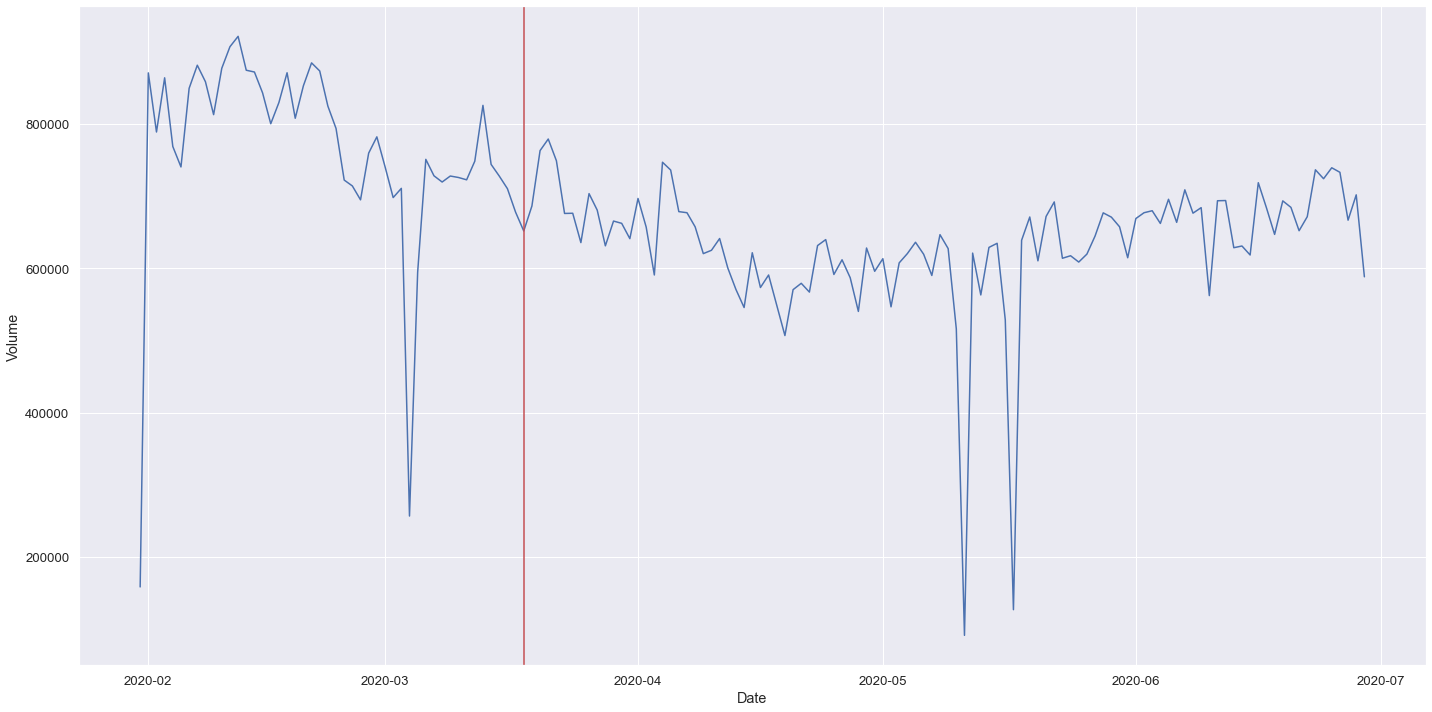

In [124]:
fig = plt.figure(figsize=(20,10))
ax = sns.lineplot(x='Date',y='Volume',data=df_total_flux)

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [125]:
# fig = plt.figure(figsize=(30,10))
# ax = sns.barplot(x='Date',y='Volume',data=df_total_flux,palette=['#5DADE2'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# # ax.
# # ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
# # ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# # ax.set_xticklabels(labels=,rotation=45)
# # plt.xlim(0)
# plt.tight_layout()
# plt.show()

In [126]:
# df.to_csv('../../data/Flux_24h.csv', sep = ',')

### Origins count and list

In [127]:
len(df.groupby(by = 'Origin').groups.keys())

26

In [128]:
list((df.groupby(by = 'Origin').groups.keys()))

['Bas-Uele',
 'Equateur',
 'Haut-Katanga',
 'Haut-Lomami',
 'Haut-Uele',
 'Ituri',
 'Kasai',
 'Kasai-Central',
 'Kasai-Oriental',
 'Kinshasa',
 'Kongo-Central',
 'Kwango',
 'Kwilu',
 'Lomami',
 'Lualaba',
 'Mai-Ndombe',
 'Maniema',
 'Mongala',
 'Nord-Kivu',
 'Nord-Ubangi',
 'Sankuru',
 'Sud-Kivu',
 'Sud-Ubangi',
 'Tanganyika',
 'Tshopo',
 'Tshuapa']

In [129]:
df['Origin'].value_counts()

Kinshasa          1047
Nord-Kivu          668
Kasai-Central      652
Haut-Lomami        619
Haut-Katanga       559
Kwilu              536
Tshopo             516
Kasai-Oriental     477
Lomami             471
Kasai              465
Ituri              444
Lualaba            336
Sud-Kivu           293
Kwango             291
Maniema            275
Tanganyika         202
Sud-Ubangi         199
Mai-Ndombe         175
Kongo-Central      159
Nord-Ubangi        158
Bas-Uele           157
Haut-Uele          153
Equateur            65
Sankuru             62
Mongala             57
Tshuapa             14
Name: Origin, dtype: int64

### Destination count and list

In [130]:
len(df.groupby(by = 'Destination').groups.keys())

26

In [131]:
list((df.groupby(by = 'Destination').groups.keys()))

['Bas-Uele',
 'Equateur',
 'Haut-Katanga',
 'Haut-Lomami',
 'Haut-Uele',
 'Ituri',
 'Kasai',
 'Kasai-Central',
 'Kasai-Oriental',
 'Kinshasa',
 'Kongo-Central',
 'Kwango',
 'Kwilu',
 'Lomami',
 'Lualaba',
 'Mai-Ndombe',
 'Maniema',
 'Mongala',
 'Nord-Kivu',
 'Nord-Ubangi',
 'Sankuru',
 'Sud-Kivu',
 'Sud-Ubangi',
 'Tanganyika',
 'Tshopo',
 'Tshuapa']

In [132]:
df['Destination'].value_counts()

Kinshasa          982
Nord-Kivu         688
Kasai-Central     643
Haut-Lomami       598
Kwilu             543
Haut-Katanga      528
Kasai-Oriental    492
Lomami            484
Ituri             475
Kasai             473
Tshopo            469
Lualaba           335
Sud-Kivu          326
Kwango            299
Maniema           292
Sud-Ubangi        203
Tanganyika        196
Mai-Ndombe        189
Nord-Ubangi       163
Kongo-Central     162
Haut-Uele         157
Bas-Uele          147
Sankuru            66
Equateur           58
Mongala            58
Tshuapa            24
Name: Destination, dtype: int64

### Symmetry check 

In [133]:
df[((df['Origin'] == 'Haut-Katanga') & (df['Destination'] == 'Kinshasa'))|((df['Origin'] == 'Kinshasa') & (df['Destination'] == 'Haut-Katanga'))]

Date        Origin   Destination  Volume  Date_day
3    2020-01-31  Haut-Katanga      Kinshasa     177         4
16   2020-01-31      Kinshasa  Haut-Katanga      27         4
43   2020-02-01  Haut-Katanga      Kinshasa     692         5
66   2020-02-01      Kinshasa  Haut-Katanga     810         5
117  2020-02-02  Haut-Katanga      Kinshasa    2050         6
...         ...           ...           ...     ...       ...
8806 2020-06-25      Kinshasa  Haut-Katanga    1155         3
8841 2020-06-26  Haut-Katanga      Kinshasa      30         4
8862 2020-06-26      Kinshasa  Haut-Katanga     157         4
8894 2020-06-27  Haut-Katanga      Kinshasa     111         5
8915 2020-06-27      Kinshasa  Haut-Katanga      67         5

[186 rows x 5 columns]

### Shapefile Reading

In [134]:
zone_gd =gpd.read_file('./data/GEO DRC/RDC_Macro_Provinces.shp')
zone_gd

Index        C0        C1    Surface        PROVINCE  Population  \
0      22  0.415854  0.011909   52049.63      Sud-Ubangi   2 744 345   
1       7  0.458879  0.012838   54171.85     Nord-Ubangi   1 037 000   
2       2  0.451896  0.042421   56144.21         Mongala   1 793 564   
3      24  0.351923  0.003476  102527.71        Equateur   1 626 606   
4       8  0.247170  0.006137  132254.42         Tshuapa   1 316 855   
5      18  0.448842  0.040899  128920.31      Maï-Ndombe   1 768 327   
6      11  0.860444  0.013058   54797.26   Kongo-Central   5 575 000   
7       6  0.825040  0.071389   10690.79        Kinshasa  12 641 463   
8      20  0.478043  0.036460   90159.33          Kwango   1 994 036   
9      17  0.589400  0.045920   79270.37           Kwilu   3 637 000   
10     13  0.643254  0.039597   96648.35           Kasaï   3 199 891   
11     23  0.752269  0.082495   57045.44   Kasaï-Central   2 976 806   
12     16  0.844232  0.122613   10216.83  Kasaï-Oriental   5 475 398   
13     15  0.769327  0.081114   54314.18          Lomami   2 048 839   
14     25  0.688503  0.034374  109587.20     Haut-Lomami   2 540 127   
15      5  0.658575  0.037058  121992.73         Lualaba   1 677 288   
16      4  0.711857  0.022679  126576.44    Haut-Katanga   3 960 945   
17      1  0.524977  0.013152  134692.21      Tanganyika   2 482 009   
18     26  0.746701  0.034413   60031.77       Nord-Kivu   8 985 711   
19      9  0.529363  0.012831   65199.55        Sud-Kivu   5 772 000   
20     19  0.438406  0.025023  128678.93         Maniema   2 333 000   
21      3  0.385224  0.011245  108400.19         Sankuru   1 007 000   
22     10  0.395584  0.025731  201525.01          Tshopo   2 614 630   
23     14  0.388050  0.024537  149347.27        Bas-Uele   1 093 845   
24     21  0.495825  0.038647   92916.10       Haut-Uele   1 920 867   
25     12  0.686450  0.041201   66389.05           Ituri   4 241 236   

                                             geometry  
0   POLYGON ((18.68941 1.90628, 18.68649 1.90233, ...  
1   POLYGON ((20.39471 2.82687, 20.38231 2.81683, ...  
2   POLYGON ((21.63564 0.72938, 21.63387 0.72562, ...  
3   POLYGON ((16.94268 -1.86609, 16.94502 -2.00127...  
4   POLYGON ((21.84714 -2.53010, 21.84408 -2.53239...  
5   POLYGON ((20.27067 -4.39762, 20.26608 -4.39898...  
6   POLYGON ((12.45101 -6.05762, 12.44231 -6.05843...  
7   POLYGON ((15.83177 -5.02521, 15.83079 -5.02540...  
8   POLYGON ((17.61132 -8.12849, 17.58297 -8.12907...  
9   POLYGON ((19.36211 -6.39133, 19.35877 -6.39137...  
10  POLYGON ((20.57820 -7.29812, 20.54287 -7.29890...  
11  MULTIPOLYGON (((22.68625 -7.88297, 22.66109 -7...  
12  MULTIPOLYGON (((23.61644 -6.77145, 23.60941 -6...  
13  POLYGON ((23.68508 -7.99435, 23.68487 -7.99446...  
14  MULTIPOLYGON (((24.93444 -10.12938, 24.93029 -...  
15  POLYGON ((25.53683 -11.73446, 25.53175 -11.739...  
16  POLYGON ((29.72198 -13.45500, 29.71200 -13.456...  
17  MULTIPOLYGON (((28.06762 -8.41209, 28.06240 -8...  
18  POLYGON ((28.10913 -2.06207, 28.09976 -2.06577...  
19  MULTIPOLYGON (((28.90091 -5.00969, 28.80352 -5...  
20  MULTIPOLYGON (((28.41204 -5.01963, 28.40892 -5...  
21  MULTIPOLYGON (((23.90875 -5.85458, 23.90625 -5...  
22  POLYGON ((25.27648 -2.09896, 25.24008 -2.11198...  
23  POLYGON ((27.04530 1.95042, 27.04404 1.94119, ...  
24  POLYGON ((27.77349 1.44670, 27.77349 1.44325, ...  
25  POLYGON ((28.56843 0.52260, 28.55496 0.51962, ...

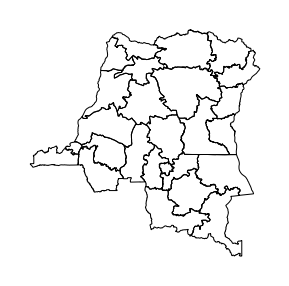

In [135]:
gpl.polyplot(zone_gd, figsize=(5,5))
plt.show()

# Mobility Visualization

## $\Delta$ Mobillity (IN) By Provinces

In [209]:
df_temp = df.groupby(by=['Date','Date_day','Destination'],as_index=0).sum()

KeyError: 'Date_day'

In [210]:
df_temp[df_temp.Destination == 'Kinshasa']

Date  Date_day Destination  Volume
6    2020-01-31         4    Kinshasa    6877
26   2020-02-01         5    Kinshasa   37417
46   2020-02-02         6    Kinshasa   30852
68   2020-02-03         0    Kinshasa   25785
92   2020-02-04         1    Kinshasa   26725
...         ...       ...         ...     ...
3247 2020-06-25         3    Kinshasa   17819
3269 2020-06-26         4    Kinshasa   17066
3290 2020-06-27         5    Kinshasa   25873
3311 2020-06-28         6    Kinshasa   19892
3332 2020-06-29         0    Kinshasa   19446

[151 rows x 4 columns]

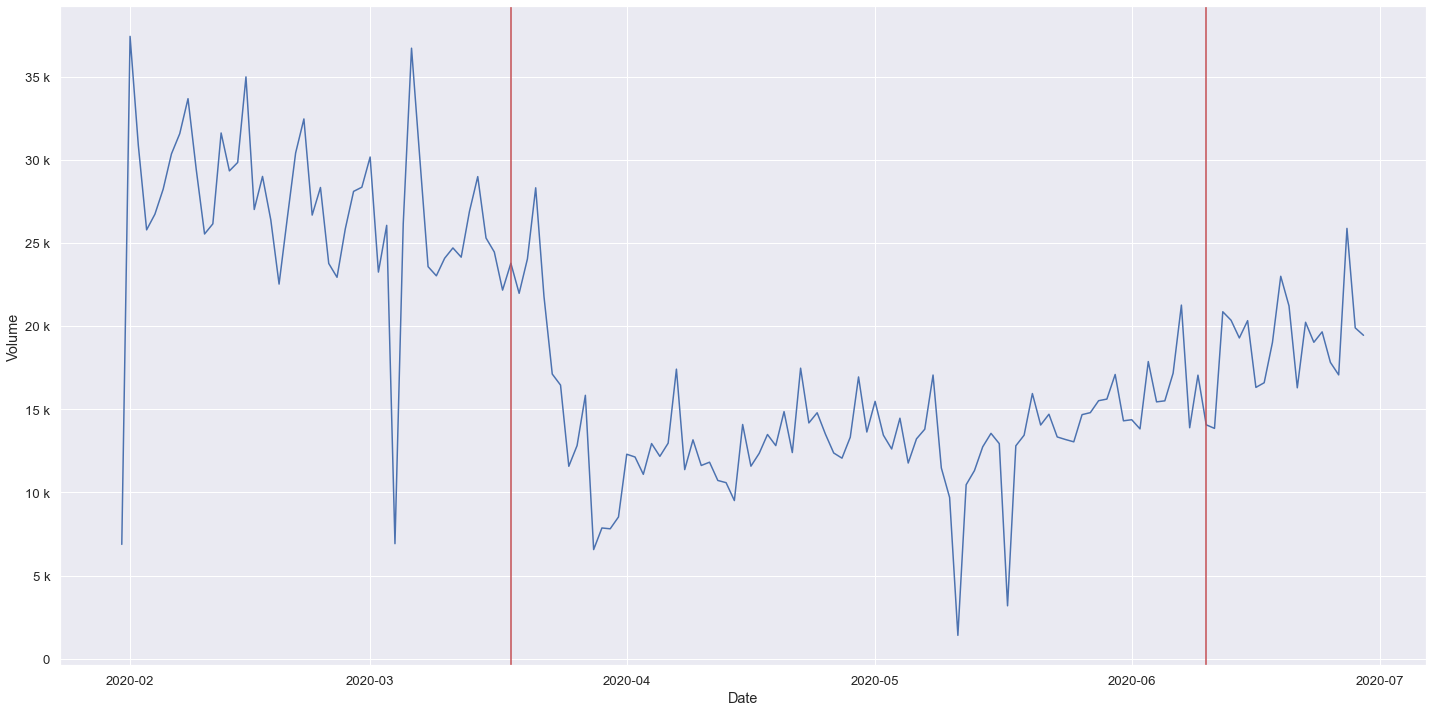

In [138]:
fig = plt.figure(figsize=(20,10))
ax = sns.lineplot(x='Date',y='Volume',data=df_temp[df_temp.Destination == 'Kinshasa' ])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')

ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [211]:
def filter_df_from_to(start_date, end_date, df):
    mask_base = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    return df.loc[mask_base]

In [140]:
# df_p1 = filter_df_from_to('2020-02-01','2020-03-18',df)
# df_p2 = filter_df_from_to('2020-03-19','2020-06-10',df)
# df_p3 = filter_df_from_to('2020-06-11','2020-06-29',df)

In [141]:
# df_p1.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)

# df_p1_agg = df_p1.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)

# merged_df_agg = zone_gd.merge(df_p1_agg,left_on = 'PROVINCE', right_on = 'Destination' )
# gpl.choropleth(
#     merged_df_agg, hue=merged_df_agg['Volume'],
#     cmap='Reds', figsize=(12, 12),
#     legend=True
#     , legend_kwargs={'orientation': 'horizontal'}
# )
# plt.show()

In [142]:
# df_p2.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)

# df_p2_agg = df_p2.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)

# merged_df_agg = zone_gd.merge(df_p2_agg,left_on = 'PROVINCE', right_on = 'Destination' )
# gpl.choropleth(
#     merged_df_agg, hue=merged_df_agg['Volume'],
#     cmap='Reds', figsize=(12, 12),
#     legend=True
#     , legend_kwargs={'orientation': 'horizontal'}
# )
# plt.show()

In [143]:
# df_p3.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)

# df_p3_agg = df_p3.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)

# merged_df_agg = zone_gd.merge(df_p3_agg,left_on = 'PROVINCE', right_on = 'Destination' )
# gpl.choropleth(
#     merged_df_agg, hue=merged_df_agg['Volume'],
#     cmap='Reds', figsize=(12, 12),
#     legend=True
#     , legend_kwargs={'orientation': 'horizontal'}
# )
# plt.show()

In [144]:
# #Comparison between p1 and p2

# df_merged_agg = pd.merge(df_p1_agg,df_p2_agg,left_on='Destination',right_on='Destination')

# df_merged_agg['diffVolume'] = (df_merged_agg.Volume_y - df_merged_agg.Volume_x )

# df_merged_agg['deltaVolume'] = df_merged_agg['diffVolume']/df_merged_agg.Volume_x*100
# df_merged_agg = df_merged_agg.sort_values(by='Destination')
# df_merged_agg

In [145]:
# merged_df_agg = zone_gd.merge(df_merged_agg,left_on = 'PROVINCE', right_on = 'Destination' )
# gpl.choropleth(
#     merged_df_agg, hue=merged_df_agg['deltaVolume'],
#     cmap='Reds', figsize=(12, 12),
#     legend=True
#     , legend_kwargs={'orientation': 'vertical'}
# )
# plt.show()

In [146]:
# #Comparison between p1 and p3

# df_merged_agg = pd.merge(df_p1_agg,df_p3_agg,left_on='Destination',right_on='Destination')

# df_merged_agg['diffVolume'] = (df_merged_agg.Volume_y - df_merged_agg.Volume_x )

# df_merged_agg['deltaVolume'] = df_merged_agg['diffVolume']/df_merged_agg.Volume_x*100
# df_merged_agg = df_merged_agg.sort_values(by='Destination')
# df_merged_agg

In [147]:
# merged_df_agg = zone_gd.merge(df_merged_agg,left_on = 'PROVINCE', right_on = 'Destination' )
# gpl.choropleth(
#     merged_df_agg, hue=merged_df_agg['deltaVolume'],
#     cmap='Reds', figsize=(12, 12),
#     legend=True
#     , legend_kwargs={'orientation': 'horizontal'}
# )
# plt.show()

In [212]:
df[df.Destination == 'Tshuapa']

Date    Origin Destination Immobility  \
2207    2020-02-02  Equateur     Tshuapa         3h   
2208    2020-02-02  Equateur     Tshuapa         3h   
4751    2020-02-05  Equateur     Tshuapa         3h   
6245    2020-02-06  Kinshasa     Tshuapa         3h   
7373    2020-02-07  Kinshasa     Tshuapa         3h   
10619   2020-02-10  Kinshasa     Tshuapa         3h   
10889   2020-02-10   Sankuru     Tshuapa         3h   
13508   2020-02-13  Equateur     Tshuapa         3h   
13906   2020-02-13  Kinshasa     Tshuapa         3h   
18571   2020-02-17    Tshopo     Tshuapa         3h   
21137   2020-02-20  Equateur     Tshuapa         3h   
21560   2020-02-20  Kinshasa     Tshuapa         3h   
21561   2020-02-20  Kinshasa     Tshuapa         3h   
22243   2020-02-21  Equateur     Tshuapa         3h   
23396   2020-02-22  Equateur     Tshuapa         3h   
25993   2020-02-24  Kinshasa     Tshuapa         3h   
25994   2020-02-24  Kinshasa     Tshuapa         3h   
29222   2020-02-27  Kinshasa     Tshuapa         3h   
32527   2020-03-01  Kinshasa     Tshuapa         3h   
36361   2020-03-05  Kinshasa     Tshuapa         3h   
39247   2020-03-08  Equateur     Tshuapa         3h   
44035   2020-03-12  Kinshasa     Tshuapa         3h   
44036   2020-03-12  Kinshasa     Tshuapa         3h   
44037   2020-03-12  Kinshasa     Tshuapa         3h   
51615   2020-03-19  Kinshasa     Tshuapa         3h   
51616   2020-03-19  Kinshasa     Tshuapa         3h   
51617   2020-03-19  Kinshasa     Tshuapa         3h   
56540   2020-03-24  Equateur     Tshuapa         3h   
56541   2020-03-24  Equateur     Tshuapa         3h   
69590   2020-04-07  Equateur     Tshuapa         3h   
119668  2020-06-03    Tshopo     Tshuapa         3h   
136153  2020-06-22  Equateur     Tshuapa         3h   

                    Home_Category        Activity_Category Observation_Zone  \
2207          Study_Zone_Resident        Study_Zone_Worker      ZoneGlobale   
2208         Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
4751         Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
6245             Outside_Resident           Outside_Worker      ZoneGlobale   
7373             Outside_Resident           Outside_Worker      ZoneGlobale   
10619        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
10889        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
13508        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
13906        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
18571        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
21137   Destination_Zone_Resident  Destination_Zone_Worker      ZoneGlobale   
21560            Outside_Resident           Outside_Worker      ZoneGlobale   
21561        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
22243         Study_Zone_Resident        Study_Zone_Worker      ZoneGlobale   
23396        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
25993            Outside_Resident           Outside_Worker      ZoneGlobale   
25994        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
29222        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
32527        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
36361        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
39247        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
44035            Outside_Resident           Outside_Worker      ZoneGlobale   
44036        Origin_Zone_Resident           Outside_Worker      ZoneGlobale   
44037        Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
51615            Outside_Resident       Origin_Zone_Worker      ZoneGlobale   
51616         Study_Zone_Resident        Study_Zone_Worker      ZoneGlobale   
51617        Origin_Zone_Resident       Origin_Zone_Worker      Z

In [213]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-18'
ref_end_date = '2020-03-18'

# mask_base = (df['Date'] >= ref_start_date) & (df['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-06-29'

# mask_obs = (df['Date'] >= obs_start_date) & (df['Date'] <= obs_end_date)

df_ref = filter_df_from_to(ref_start_date,ref_end_date,df)#df.loc[mask_base]
df_obs = filter_df_from_to(obs_start_date,obs_end_date,df)#df.loc[mask_obs]


## Reference period

In [214]:
df_ref_agg = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
# df_ref_agg[df_ref_agg.Destination == 'Kinshasa']

KeyError: 'Date_day'

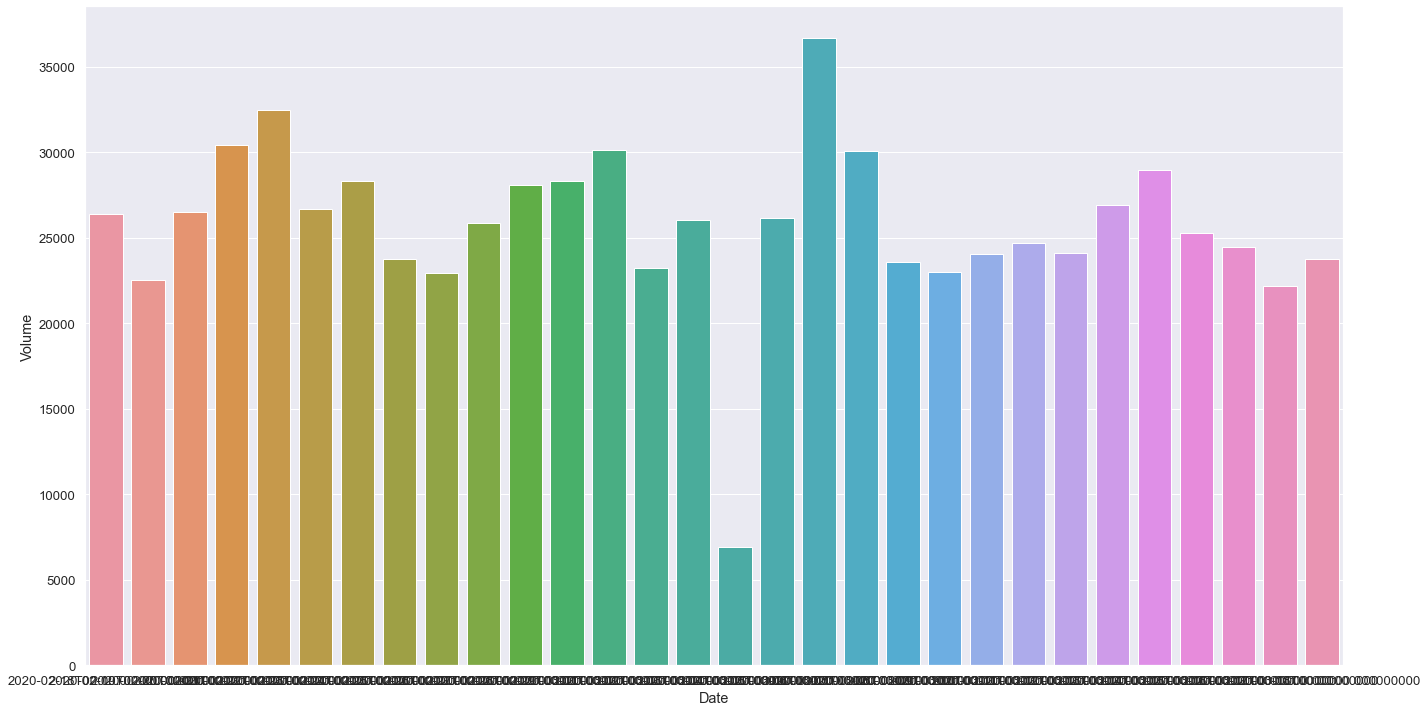

In [173]:
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x='Date',y='Volume',data=df_ref_agg[df_ref_agg.Destination == 'Kinshasa'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [174]:
df_ref_agg = df_ref.groupby(by=['Date','Destination'],as_index=0).sum()
df_ref_agg = df_ref_agg.groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_ref_agg.drop('Date_day',inplace=True,axis = 1)
df_ref_agg

Destination    Volume
8   Kasai-Oriental  152761.0
13          Lomami  125081.0
18       Nord-Kivu   92319.5
21        Sud-Kivu   85518.0
14         Lualaba   61798.5
2     Haut-Katanga   60694.5
7    Kasai-Central   59823.0
9         Kinshasa   25951.0
10   Kongo-Central   22379.0
3      Haut-Lomami   12889.5
6            Kasai    9971.5
12           Kwilu    7448.5
5            Ituri    7216.0
11          Kwango    3280.0
24          Tshopo    1541.0
15      Mai-Ndombe    1303.0
19     Nord-Ubangi    1117.0
22      Sud-Ubangi    1031.5
16         Maniema     930.0
1         Equateur     582.0
0         Bas-Uele     265.5
25         Tshuapa     240.0
17         Mongala     239.5
4        Haut-Uele     190.0
23      Tanganyika     155.5
20         Sankuru      68.0

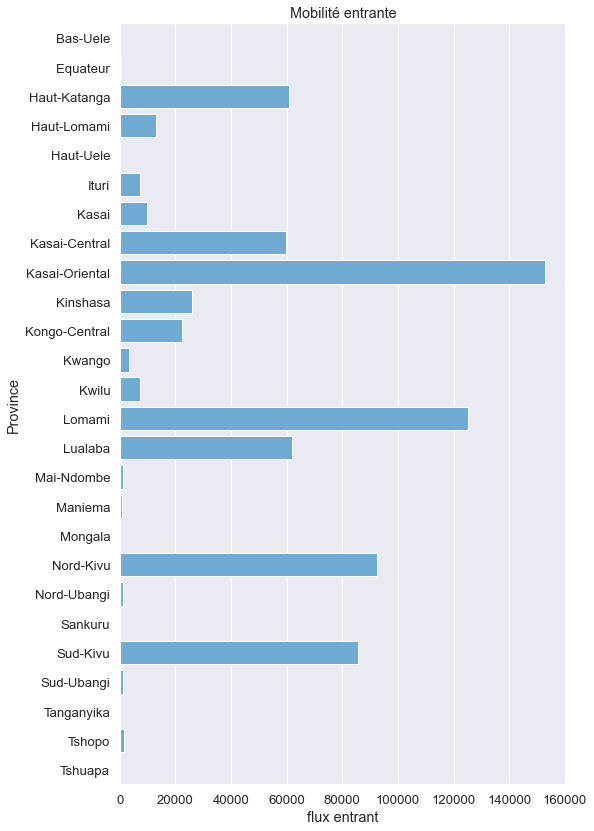

In [175]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="Volume", palette=['#5DADE2'],data=df_ref_agg.sort_values(by = 'Destination',ascending=1), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = "flux entrant",ylabel = 'Province')
plt.show()

In [176]:
# merged_df_agg = zone_gd.merge(df_ref_agg,left_on = 'PROVINCE', right_on = 'Destination' )
# gpl.choropleth(
#     merged_df_agg, hue=merged_df_agg['Volume'],
#     cmap='Reds', figsize=(12, 12),
#     legend=True
#     , legend_kwargs={'orientation': 'horizontal'}
# )
# plt.show()

## Observation period

In [177]:
df_obs_agg = df_obs.groupby(by=['Date','Date_day','Destination'],as_index=0).sum()
df_obs_agg[df_obs_agg.Destination == 'Kinshasa']

Date  Date_day Destination  Volume
9    2020-03-19         3    Kinshasa   21969
31   2020-03-20         4    Kinshasa   24036
55   2020-03-21         5    Kinshasa   28313
77   2020-03-22         6    Kinshasa   21785
101  2020-03-23         0    Kinshasa   17117
...         ...       ...         ...     ...
2136 2020-06-25         3    Kinshasa   17819
2158 2020-06-26         4    Kinshasa   17066
2179 2020-06-27         5    Kinshasa   25873
2200 2020-06-28         6    Kinshasa   19892
2221 2020-06-29         0    Kinshasa   19446

[103 rows x 4 columns]

In [178]:
df_obs_agg = df_obs.groupby(by=['Date','Destination'],as_index=0).sum()

df_obs_agg = df_obs_agg.groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_obs_agg.drop('Date_day',inplace=True,axis = 1)
df_obs_agg

Destination    Volume
8   Kasai-Oriental  153126.0
13          Lomami  123495.0
18       Nord-Kivu   70640.0
21        Sud-Kivu   67807.0
7    Kasai-Central   58016.0
14         Lualaba   47594.0
2     Haut-Katanga   45702.0
3      Haut-Lomami   14296.0
9         Kinshasa   14053.0
10   Kongo-Central   12755.0
6            Kasai    9961.0
12           Kwilu    6343.0
5            Ituri    4572.0
11          Kwango    2323.0
15      Mai-Ndombe    1724.5
22      Sud-Ubangi     933.0
19     Nord-Ubangi     903.0
24          Tshopo     630.5
25         Tshuapa     344.0
17         Mongala     317.0
1         Equateur     276.5
16         Maniema     226.0
0         Bas-Uele     213.0
4        Haut-Uele     119.0
20         Sankuru      60.0
23      Tanganyika      42.0

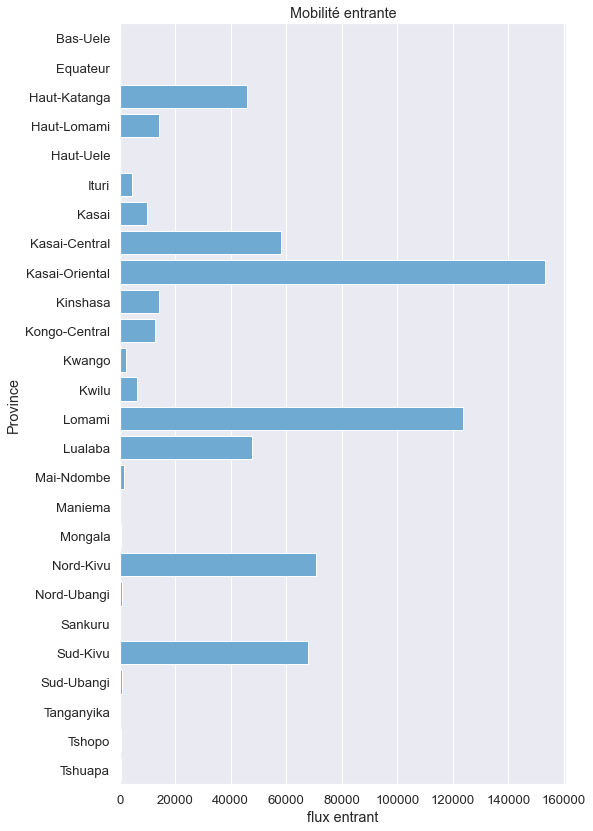

In [179]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="Volume", palette=['#5DADE2'],data=df_obs_agg.sort_values(by = 'Destination',ascending=1), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = "flux entrant",ylabel = 'Province')
plt.show()

In [180]:
# merged_df_agg = zone_gd.merge(df_obs_agg,left_on = 'PROVINCE', right_on = 'Destination' )
# gpl.choropleth(
#     merged_df_agg, hue=merged_df_agg['Volume'],
#     cmap='Reds', figsize=(12, 12),
#     legend=True
#     , legend_kwargs={'orientation': 'horizontal'}
# )
# plt.show()

## Comparison

In [181]:
df_merged_agg = pd.merge(df_ref_agg,df_obs_agg,left_on='Destination',right_on='Destination')

df_merged_agg['diffVolume'] = (df_merged_agg.Volume_y - df_merged_agg.Volume_x )

df_merged_agg['deltaVolume'] = df_merged_agg['diffVolume']/df_merged_agg.Volume_x*100
df_merged_agg = df_merged_agg.sort_values(by='deltaVolume')
df_merged_agg

Destination  Volume_x  Volume_y  diffVolume  deltaVolume
18         Maniema     930.0     226.0      -704.0   -75.698925
24      Tanganyika     155.5      42.0      -113.5   -72.990354
14          Tshopo    1541.0     630.5      -910.5   -59.085010
19        Equateur     582.0     276.5      -305.5   -52.491409
7         Kinshasa   25951.0   14053.0    -11898.0   -45.847944
8    Kongo-Central   22379.0   12755.0     -9624.0   -43.004603
23       Haut-Uele     190.0     119.0       -71.0   -37.368421
12           Ituri    7216.0    4572.0     -2644.0   -36.640798
13          Kwango    3280.0    2323.0      -957.0   -29.176829
5     Haut-Katanga   60694.5   45702.0    -14992.5   -24.701579
2        Nord-Kivu   92319.5   70640.0    -21679.5   -23.483121
4          Lualaba   61798.5   47594.0    -14204.5   -22.985186
3         Sud-Kivu   85518.0   67807.0    -17711.0   -20.710260
20        Bas-Uele     265.5     213.0       -52.5   -19.774011
16     Nord-Ubangi    1117.0     903.0      -214.0   -19.158460
11           Kwilu    7448.5    6343.0     -1105.5   -14.841914
25         Sankuru      68.0      60.0        -8.0   -11.764706
17      Sud-Ubangi    1031.5     933.0       -98.5    -9.549200
6    Kasai-Central   59823.0   58016.0     -1807.0    -3.020577
1           Lomami  125081.0  123495.0     -1586.0    -1.267978
10           Kasai    9971.5    9961.0       -10.5    -0.105300
0   Kasai-Oriental  152761.0  153126.0       365.0     0.238935
9      Haut-Lomami   12889.5   14296.0      1406.5    10.911983
15      Mai-Ndombe    1303.0    1724.5       421.5    32.348427
22         Mongala     239.5     317.0        77.5    32.359081
21         Tshuapa     240.0     344.0       104.0    43.333333

In [195]:
df[df.Destination == 'Tshuapa'].groupby(['Date','Date_day', 'Destination'], as_index=False).sum()

Date  Date_day Destination  Volume
0  2020-02-02         6     Tshuapa     812
1  2020-02-05         2     Tshuapa     193
2  2020-02-06         3     Tshuapa     208
3  2020-02-07         4     Tshuapa     224
4  2020-02-10         0     Tshuapa     215
5  2020-02-13         3     Tshuapa     386
6  2020-02-17         0     Tshuapa      70
7  2020-02-20         3     Tshuapa     552
8  2020-02-21         4     Tshuapa     185
9  2020-02-22         5     Tshuapa     240
10 2020-02-24         0     Tshuapa     472
11 2020-02-27         3     Tshuapa      30
12 2020-03-01         6     Tshuapa     176
13 2020-03-05         3     Tshuapa     279
14 2020-03-08         6     Tshuapa     201
15 2020-03-12         3     Tshuapa     875
16 2020-03-19         3     Tshuapa     771
17 2020-03-24         1     Tshuapa     335
18 2020-04-07         1     Tshuapa     344
19 2020-06-03         2     Tshuapa      77
20 2020-06-22         0     Tshuapa    1452

In [182]:
# dict_mob = {}
# for dest in list((df.groupby(by = 'Destination').groups.keys())):
#     baseline_value = df_ref['Volume'].loc[df_ref['Destination'] == dest ].sum() 
#      #avoid division by zero
#     if(baseline_value == 0):
#         continue
#     current_value = df_obs['Volume'].loc[df_obs['Destination'] == dest ].sum() 
#     dict_mob[dest] = (current_value - baseline_value)*100/baseline_value
# dict_mob
# df_mobility = pd.DataFrame(dict(provinces = list(dict_mob.keys()),Volume = list(dict_mob.values())))
# df_mobility

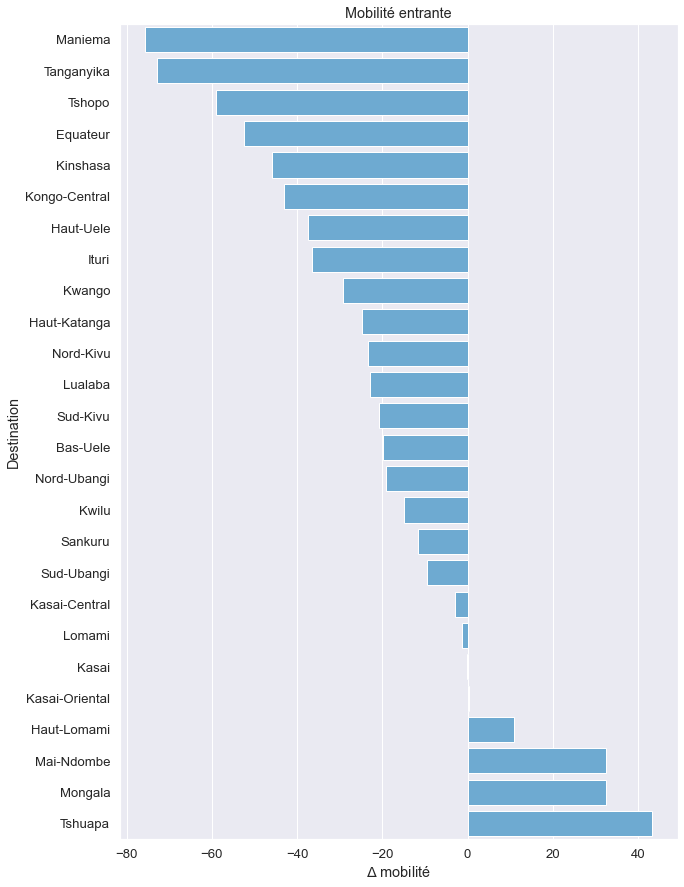

In [183]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Destination", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg, orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = '$\Delta$ mobilité')
plt.show()

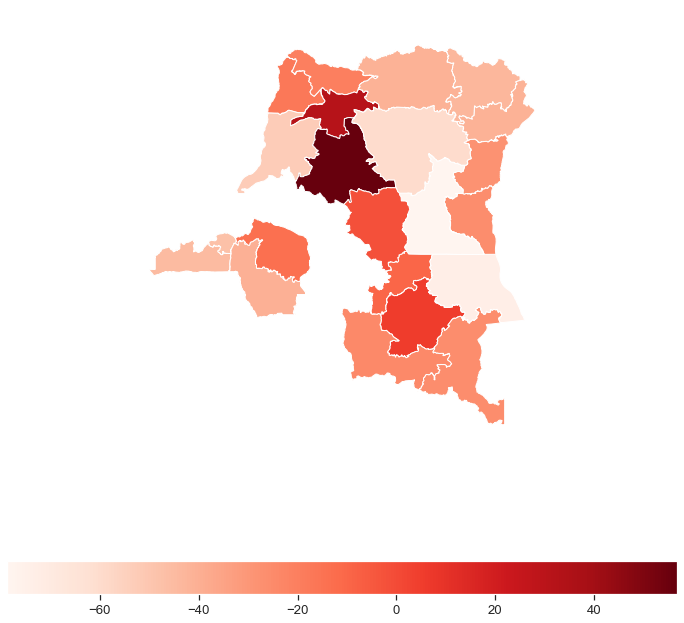

In [163]:
merged_agg = zone_gd.merge(df_merged_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_agg, hue=merged_agg['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

### Mobillity (IN) trends By Provinces

In [164]:
df_ref_agg_date_day = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Destination == 'Kinshasa']

Destination  Date_day   Volume
63    Kinshasa         0  25536.0
64    Kinshasa         1  26056.0
65    Kinshasa         2  23778.0
66    Kinshasa         3  26335.0
67    Kinshasa         4  30121.5
68    Kinshasa         5  32452.0
69    Kinshasa         6  27009.0

In [165]:
df_obs_agg_date_dest_dd = df_obs.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Destination == 'Kinshasa']

Date Destination  Date_day  Volume
9    2020-03-19    Kinshasa         3   21969
31   2020-03-20    Kinshasa         4   24036
55   2020-03-21    Kinshasa         5   28313
77   2020-03-22    Kinshasa         6   21785
101  2020-03-23    Kinshasa         0   17117
...         ...         ...       ...     ...
2136 2020-06-25    Kinshasa         3   17819
2158 2020-06-26    Kinshasa         4   17066
2179 2020-06-27    Kinshasa         5   25873
2200 2020-06-28    Kinshasa         6   19892
2221 2020-06-29    Kinshasa         0   19446

[103 rows x 4 columns]

In [166]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Destination','Date_day'],right_on=['Destination','Date_day']).sort_values(by='Date')

In [167]:
df_trend['deltaV'] = (df_trend['Volume_x'] - df_trend['Volume_y'])/df_trend['Volume_y']*100
# df_trend = df_trend[df_trend.Destination == 'Kinshasa']
df_trend

Date   Destination  Date_day  Volume_x  Volume_y      deltaV
0    2020-03-19      Bas-Uele         3       241     534.0  -54.868914
57   2020-03-19         Ituri         3      7291    8276.5  -11.907207
72   2020-03-19         Kasai         3      8166   10385.5  -21.371142
306  2020-03-19       Tshuapa         3       771     332.5  131.879699
291  2020-03-19        Tshopo         3      2582    2562.5    0.760976
...         ...           ...       ...       ...       ...         ...
1298 2020-06-29   Haut-Lomami         0     11124   12988.0  -14.351709
1283 2020-06-29  Haut-Katanga         0     47384   62237.0  -23.865225
1517 2020-06-29       Sankuru         0        32      72.0  -55.555556
1442 2020-06-29        Lomami         0    109636  136360.0  -19.598123
1545 2020-06-29    Sud-Ubangi         0      3135     622.0  404.019293

[2226 rows x 6 columns]

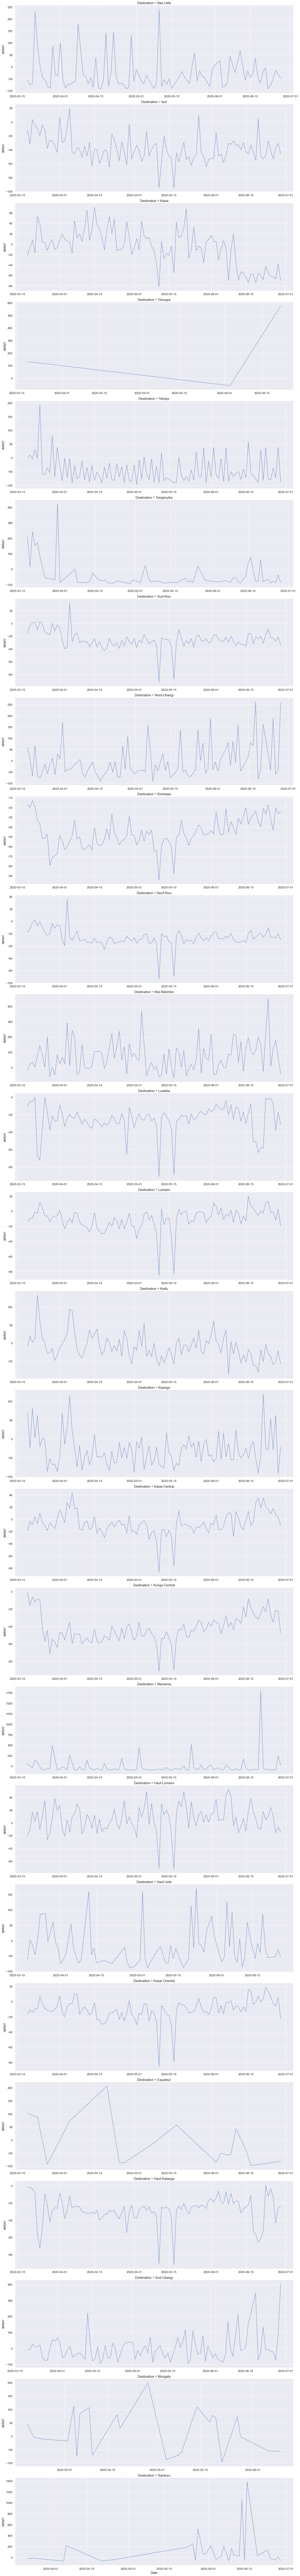

In [168]:
g = sns.FacetGrid(df_trend, row="Destination",aspect=3,height=6,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

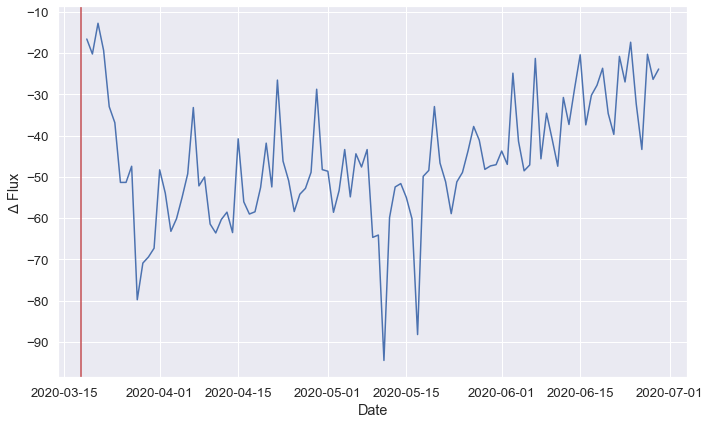

In [169]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Date',y='deltaV',data=df_trend[df_trend.Destination == 'Kinshasa'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')

ax.set(ylabel = '$\Delta$ Flux')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [170]:
df_trend[df_trend.Destination == 'Kinshasa']

Date Destination  Date_day  Volume_x  Volume_y     deltaV
117  2020-03-19    Kinshasa         3     21969   26335.0 -16.578698
419  2020-03-20    Kinshasa         4     24036   30121.5 -20.203177
738  2020-03-21    Kinshasa         5     28313   32452.0 -12.754222
1052 2020-03-22    Kinshasa         6     21785   27009.0 -19.341701
1368 2020-03-23    Kinshasa         0     17117   25536.0 -32.969142
...         ...         ...       ...       ...       ...        ...
131  2020-06-25    Kinshasa         3     17819   26335.0 -32.337194
433  2020-06-26    Kinshasa         4     17066   30121.5 -43.342795
752  2020-06-27    Kinshasa         5     25873   32452.0 -20.273019
1066 2020-06-28    Kinshasa         6     19892   27009.0 -26.350476
1382 2020-06-29    Kinshasa         0     19446   25536.0 -23.848684

[103 rows x 6 columns]

## $\Delta$ Mobillity (OUT) By Provinces

In [73]:
df_temp = df.groupby(by=['Date','Origin'],as_index=0).sum()

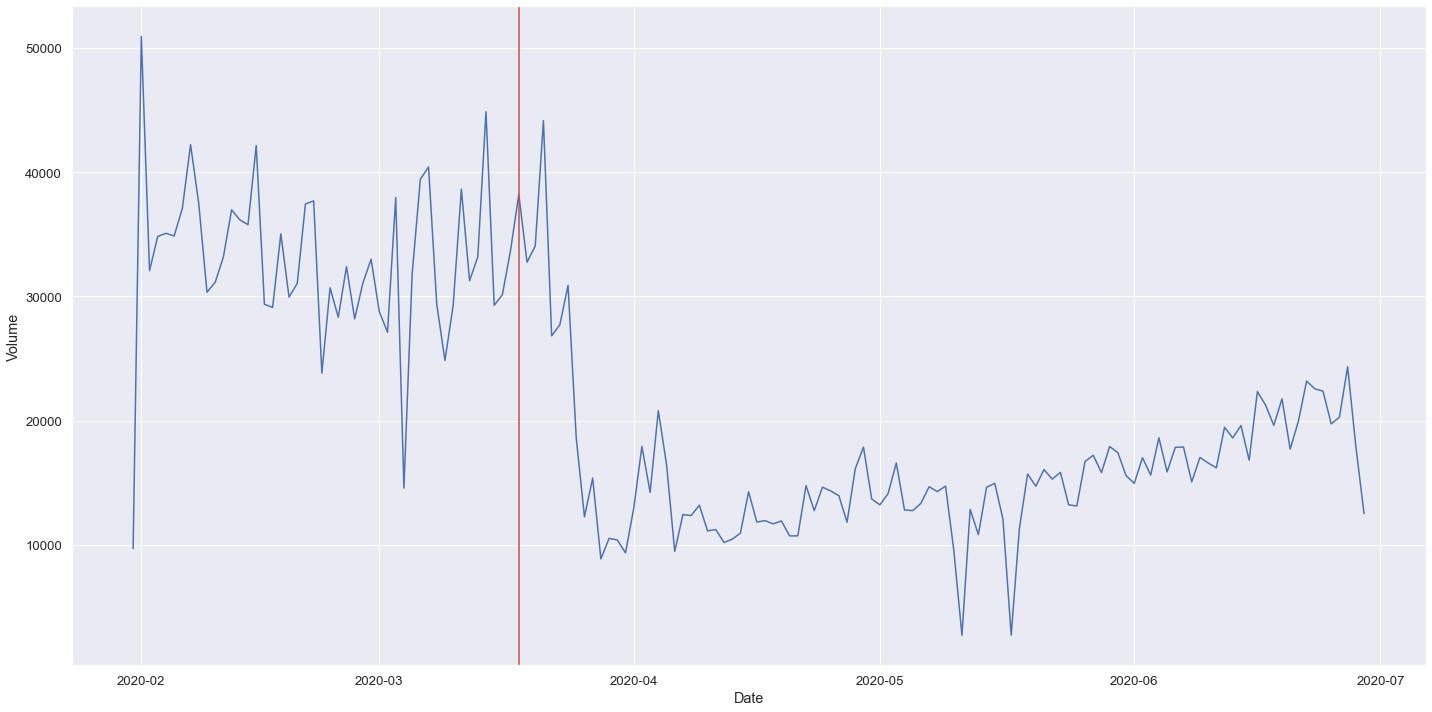

In [75]:
fig = plt.figure(figsize=(20,10))
ax = sns.lineplot(x='Date',y='Volume',data=df_temp[df_temp.Origin == 'Kinshasa' ])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')

# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [93]:
df_tshuapa = df[df.Origin == 'Tshuapa']
df_tshuapa = df_tshuapa.groupby(by=['Date','Origin'],as_index=0).sum()
df_tshuapa

Date   Origin  Volume  Date_day
0  2020-02-06  Tshuapa     205         3
1  2020-02-13  Tshuapa     428         3
2  2020-02-14  Tshuapa      28         4
3  2020-02-20  Tshuapa     280         3
4  2020-02-27  Tshuapa     376         6
5  2020-03-03  Tshuapa     554         1
6  2020-03-05  Tshuapa     550         3
7  2020-03-09  Tshuapa     216         0
8  2020-03-12  Tshuapa      21         3
9  2020-03-19  Tshuapa     199         3
10 2020-04-04  Tshuapa    1090         5
11 2020-04-22  Tshuapa     652         2
12 2020-04-30  Tshuapa     646         3

In [216]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-18'
ref_end_date = '2020-03-18'

# mask_base = (df['Date'] >= ref_start_date) & (df['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-06-29'

# mask_obs = (df['Date'] >= obs_start_date) & (df['Date'] <= obs_end_date)

df_ref_out = filter_df_from_to(ref_start_date, ref_end_date,df)#df.loc[mask_base]
df_obs_out = filter_df_from_to(obs_start_date, obs_end_date,df)#df.loc[mask_obs]


## Reference period

In [217]:
df_ref_agg_out = df_ref_out.groupby(by=['Date','Origin'],as_index=0).sum()
df_ref_agg_out = df_ref_agg_out.groupby(by='Origin',as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard();
df_ref_agg_out.drop('Date_day',inplace=True,axis = 1)
df_ref_agg_out

Origin    Volume
8   Kasai-Oriental  163011.0
13          Lomami  119295.5
18       Nord-Kivu   93477.0
21        Sud-Kivu   85519.5
2     Haut-Katanga   62995.5
14         Lualaba   59141.5
7    Kasai-Central   55811.0
9         Kinshasa   31170.5
10   Kongo-Central   20580.0
3      Haut-Lomami   12389.5
6            Kasai   10232.0
12           Kwilu    6501.5
5            Ituri    5979.0
11          Kwango    2269.0
24          Tshopo    2094.5
22      Sud-Ubangi    1340.0
19     Nord-Ubangi     994.0
15      Mai-Ndombe     951.0
16         Maniema     493.0
1         Equateur     368.0
25         Tshuapa     328.0
0         Bas-Uele     269.5
17         Mongala     260.0
23      Tanganyika     164.0
4        Haut-Uele      96.0
20         Sankuru      37.0

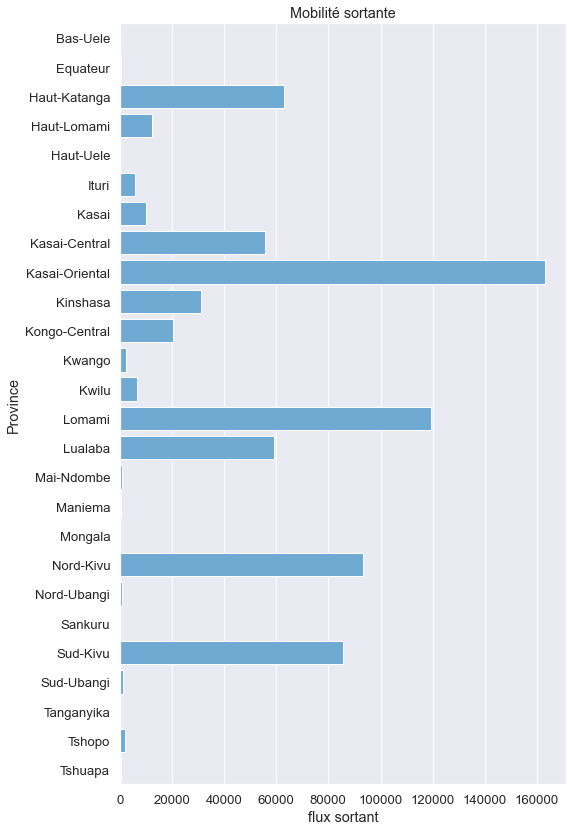

In [218]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Origin", x="Volume", palette=['#5DADE2'],data=df_ref_agg_out.sort_values(by = 'Origin',ascending=1), orient = 'h')
ax.set(title = 'Mobilité sortante',xlabel = "flux sortant",ylabel = 'Province')
plt.show()

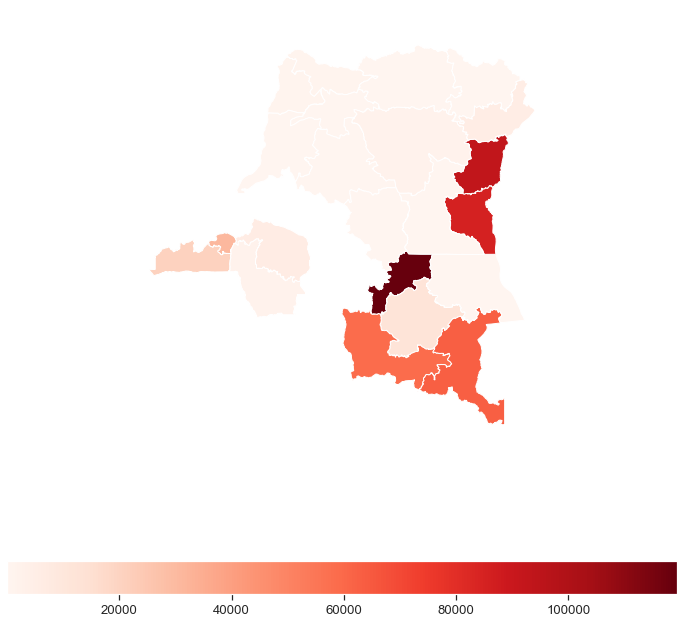

In [219]:
merged_df_agg_out = zone_gd.merge(df_ref_agg_out,left_on = 'PROVINCE', right_on = 'Origin' )
gpl.choropleth(
    merged_df_agg_out, hue=merged_df_agg_out['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Observation period

In [220]:
df_obs_agg_out = df_obs_out.groupby(by=['Date','Origin'],as_index=0).sum()
df_obs_agg_out = df_obs_agg_out.groupby(by='Origin',as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_obs_agg_out.drop('Date_day',inplace=True,axis = 1)
df_obs_agg_out

Origin    Volume
8   Kasai-Oriental  156324.0
13          Lomami  122148.0
18       Nord-Kivu   71417.0
21        Sud-Kivu   66597.0
7    Kasai-Central   58372.0
2     Haut-Katanga   47196.0
14         Lualaba   46125.0
9         Kinshasa   14942.0
3      Haut-Lomami   13502.0
10   Kongo-Central   11769.0
6            Kasai    9875.0
12           Kwilu    7176.0
5            Ituri    4559.0
11          Kwango    2545.5
15      Mai-Ndombe    1237.0
22      Sud-Ubangi     982.0
19     Nord-Ubangi     972.0
24          Tshopo     897.0
25         Tshuapa     649.0
17         Mongala     340.0
1         Equateur     317.0
16         Maniema     282.0
0         Bas-Uele     142.0
4        Haut-Uele     111.0
23      Tanganyika      56.0
20         Sankuru      53.0

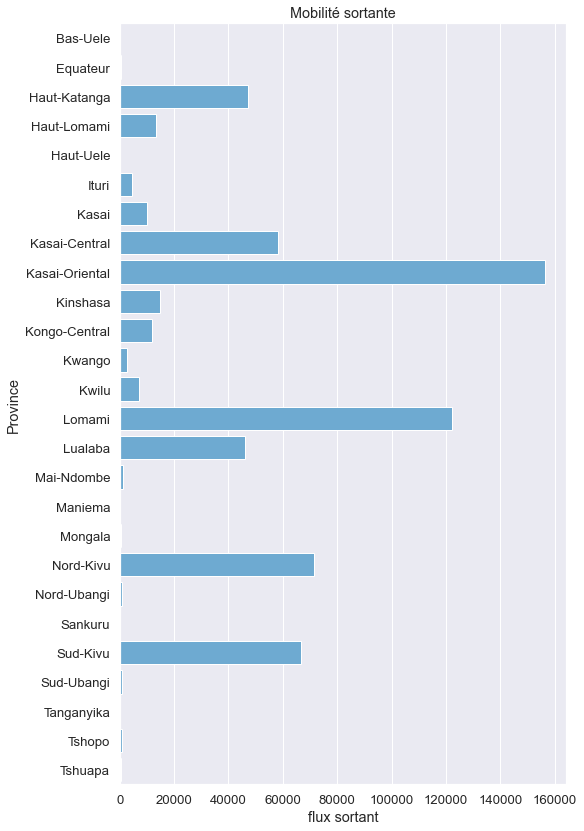

In [221]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Origin", x="Volume", palette=['#5DADE2'],data=df_obs_agg_out.sort_values(by = 'Origin',ascending=1), orient = 'h')
ax.set(title = 'Mobilité sortante',xlabel = "flux sortant",ylabel = 'Province')
plt.show()

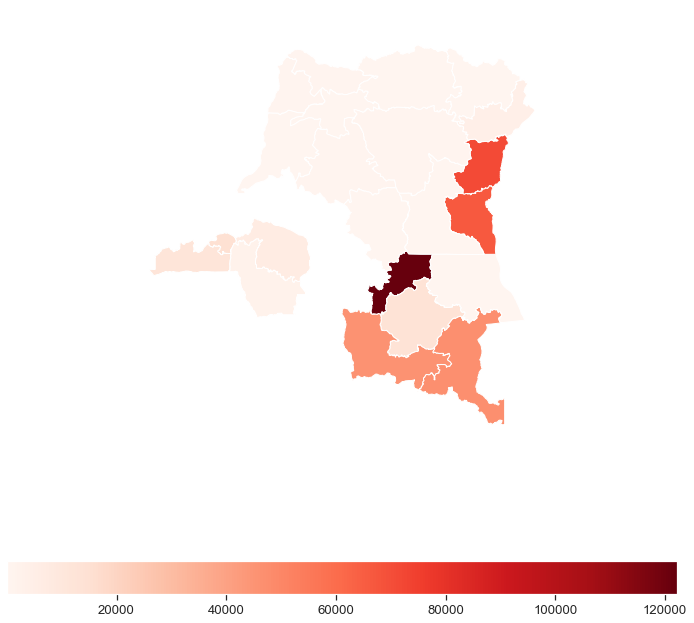

In [222]:
merged_df_agg_out = zone_gd.merge(df_obs_agg_out,left_on = 'PROVINCE', right_on = 'Origin' )
gpl.choropleth(
    merged_df_agg_out, hue=merged_df_agg_out['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Comparison

In [223]:
df_merged_agg_out = pd.merge(df_ref_agg_out,df_obs_agg_out,left_on='Origin',right_on='Origin')

df_merged_agg_out['diffVolume'] = (df_merged_agg_out.Volume_y - df_merged_agg_out.Volume_x )

df_merged_agg_out['deltaVolume'] = df_merged_agg_out['diffVolume']/df_merged_agg_out.Volume_x*100
df_merged_agg_out = df_merged_agg_out.sort_values(by='deltaVolume')
df_merged_agg_out.sort_values('deltaVolume')

Origin  Volume_x  Volume_y  diffVolume  deltaVolume
23      Tanganyika     164.0      56.0      -108.0   -65.853659
14          Tshopo    2094.5     897.0     -1197.5   -57.173550
7         Kinshasa   31170.5   14942.0    -16228.5   -52.063650
21        Bas-Uele     269.5     142.0      -127.5   -47.309833
8    Kongo-Central   20580.0   11769.0     -8811.0   -42.813411
18         Maniema     493.0     282.0      -211.0   -42.799189
15      Sud-Ubangi    1340.0     982.0      -358.0   -26.716418
4     Haut-Katanga   62995.5   47196.0    -15799.5   -25.080363
12           Ituri    5979.0    4559.0     -1420.0   -23.749791
2        Nord-Kivu   93477.0   71417.0    -22060.0   -23.599388
3         Sud-Kivu   85519.5   66597.0    -18922.5   -22.126533
5          Lualaba   59141.5   46125.0    -13016.5   -22.009080
19        Equateur     368.0     317.0       -51.0   -13.858696
0   Kasai-Oriental  163011.0  156324.0     -6687.0    -4.102177
10           Kasai   10232.0    9875.0      -357.0    -3.489054
16     Nord-Ubangi     994.0     972.0       -22.0    -2.213280
1           Lomami  119295.5  122148.0      2852.5     2.391121
6    Kasai-Central   55811.0   58372.0      2561.0     4.588701
9      Haut-Lomami   12389.5   13502.0      1112.5     8.979378
11           Kwilu    6501.5    7176.0       674.5    10.374529
13          Kwango    2269.0    2545.5       276.5    12.185985
24       Haut-Uele      96.0     111.0        15.0    15.625000
17      Mai-Ndombe     951.0    1237.0       286.0    30.073607
22         Mongala     260.0     340.0        80.0    30.769231
25         Sankuru      37.0      53.0        16.0    43.243243
20         Tshuapa     328.0     649.0       321.0    97.865854

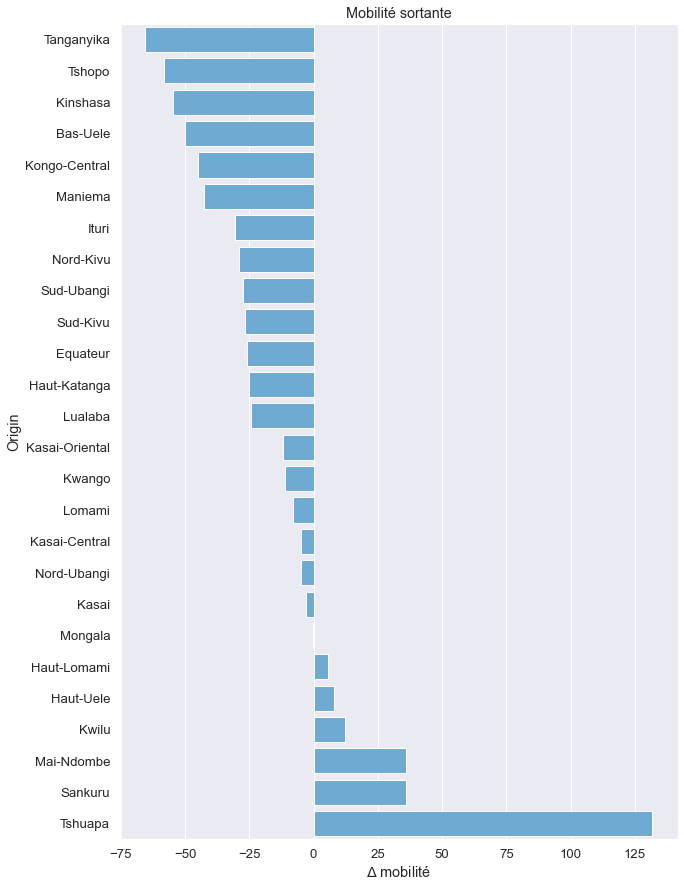

In [84]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Origin", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg_out.sort_values(by='deltaVolume'), orient = 'h')
ax.set(title = 'Mobilité sortante',xlabel = '$\Delta$ mobilité')
plt.show()

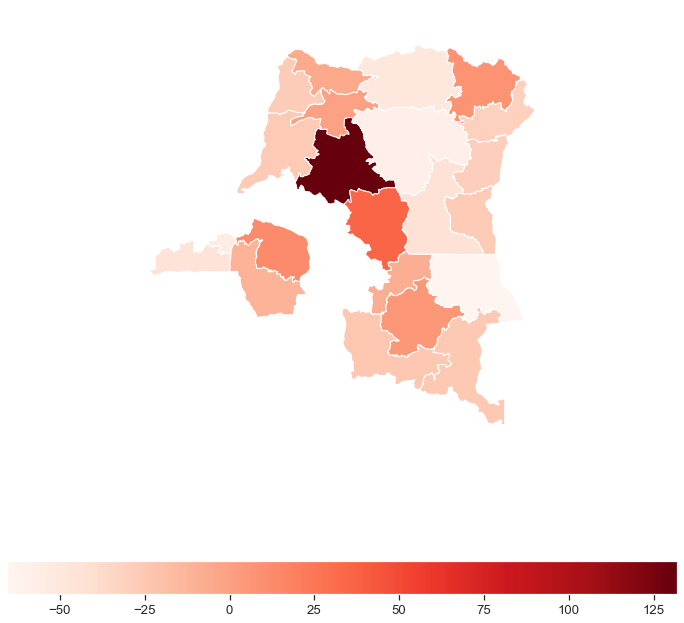

In [85]:
merged_agg_out = zone_gd.merge(df_merged_agg_out,left_on = 'PROVINCE', right_on = 'Origin' )
gpl.choropleth(
    merged_agg_out, hue=merged_agg_out['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

### Mobillity (OUT) trends By Provinces

In [86]:
df_ref_agg_date_day = df_ref.groupby(by=['Date','Origin','Date_day'],as_index=0).sum().groupby(by=['Origin','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Origin == 'Kinshasa']

Origin  Date_day   Volume
62  Kinshasa         0  30145.0
63  Kinshasa         1  33735.0
64  Kinshasa         2  34866.0
65  Kinshasa         3  31521.0
66  Kinshasa         4  36611.0
67  Kinshasa         5  40425.0
68  Kinshasa         6  29356.0

In [87]:
df_obs_agg_date_dest_dd = df_obs.groupby(by=['Date','Origin','Date_day'],as_index=0).sum()
df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Origin == 'Kinshasa']

Date    Origin  Date_day  Volume
8    2020-03-19  Kinshasa         3   32745
33   2020-03-20  Kinshasa         4   34059
57   2020-03-21  Kinshasa         5   44155
79   2020-03-22  Kinshasa         6   26821
102  2020-03-23  Kinshasa         0   27709
...         ...       ...       ...     ...
2131 2020-06-25  Kinshasa         3   19730
2154 2020-06-26  Kinshasa         4   20269
2176 2020-06-27  Kinshasa         5   24330
2198 2020-06-28  Kinshasa         6   17910
2220 2020-06-29  Kinshasa         0   12492

[103 rows x 4 columns]

In [88]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Origin','Date_day'],right_on=['Origin','Date_day']).sort_values(by='Date')
df_trend['deltaV'] = (df_trend['Volume_x'] - df_trend['Volume_y'])/df_trend['Volume_y']*100
# df_trend = df_trend[df_trend.Destination == 'Kinshasa']
df_trend

Date         Origin  Date_day  Volume_x  Volume_y      deltaV
0    2020-03-19       Bas-Uele         3       381     338.5   12.555391
313  2020-03-19         Tshopo         3      1791    2438.5  -26.553209
303  2020-03-19     Tanganyika         3       141      69.0  104.347826
288  2020-03-19     Sud-Ubangi         3      1800    1159.0   55.306299
273  2020-03-19       Sud-Kivu         3     73663   89082.0  -17.308772
...         ...            ...       ...       ...       ...         ...
1596 2020-06-29         Tshopo         0       505    2534.0  -80.071034
1374 2020-06-29  Kasai-Central         0     55906   63528.0  -11.997859
1359 2020-06-29          Kasai         0      3325    9994.0  -66.730038
1523 2020-06-29      Nord-Kivu         0     69079  104518.0  -33.907078
1329 2020-06-29      Haut-Uele         0       101     108.0   -6.481481

[2220 rows x 6 columns]

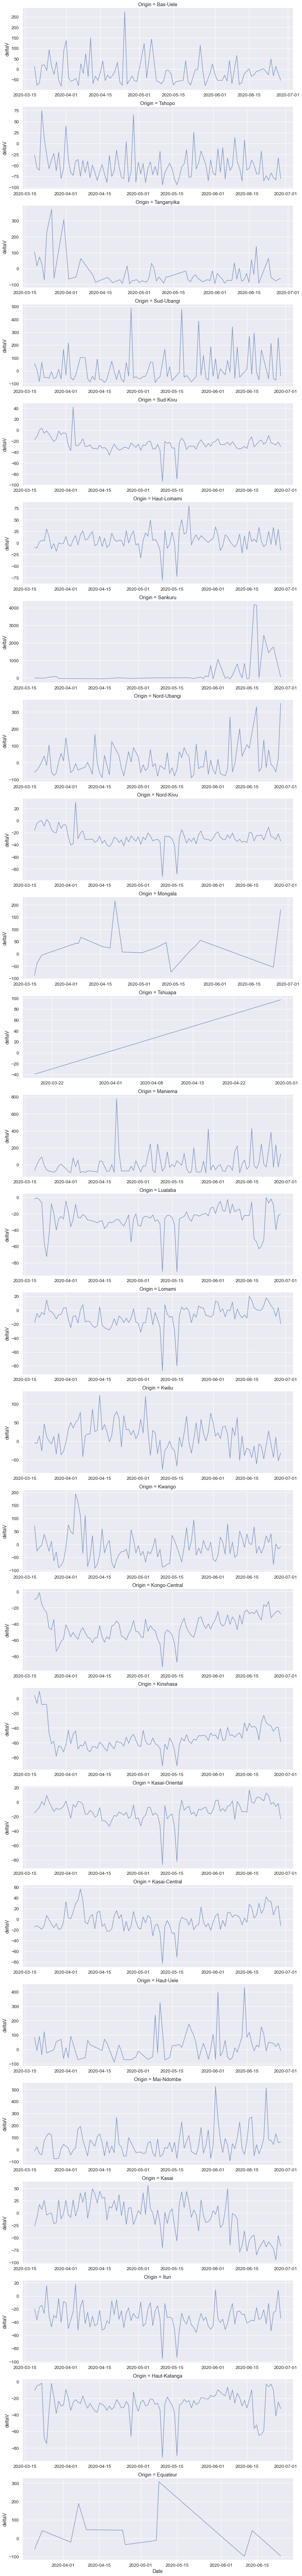

In [89]:
g = sns.FacetGrid(df_trend, row="Origin",aspect=3,height=4,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

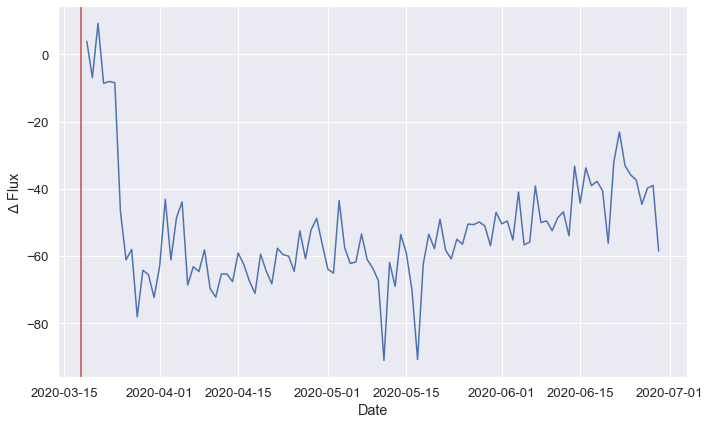

In [91]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Date',y='deltaV',data=df_trend[df_trend.Origin == 'Kinshasa'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set(ylabel = '$\Delta$ Flux')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

# Presence Visualization

In [96]:
# reading csv file
dfp = pd.read_csv('data/Zoning Province/Presence_24h.csv',sep = ';')
dfp

Date Day_type PresenceType      Type Activity_Zone  Home_Zone  \
0       2020-01-31       JO         Jour     Local     Hors_Zone  Hors_Zone   
1       2020-01-31       JO         Nuit     Local     Hors_Zone  Hors_Zone   
2       2020-01-31       JO         Jour     Local    Tanganyika  Hors_Zone   
3       2020-01-31       JO         Nuit     Local    Tanganyika  Hors_Zone   
4       2020-01-31       JO         Jour     Local  Haut-Katanga  Hors_Zone   
...            ...      ...          ...       ...           ...        ...   
173129  2020-06-29       JO         Nuit  Etranger     Nord-Kivu  Hors_Zone   
173130  2020-06-29       JO         Jour  Etranger     Hors_Zone  Nord-Kivu   
173131  2020-06-29       JO         Nuit  Etranger     Hors_Zone  Nord-Kivu   
173132  2020-06-29       JO         Jour  Etranger     Nord-Kivu  Nord-Kivu   
173133  2020-06-29       JO         Nuit  Etranger     Nord-Kivu  Nord-Kivu   

              Zone  Volume  
0       Tanganyika  105322  
1       Tanganyika   34120  
2       Tanganyika   79901  
3       Tanganyika   20994  
4       Tanganyika     176  
...            ...     ...  
173129   Nord-Kivu     968  
173130   Nord-Kivu    1575  
173131   Nord-Kivu    2025  
173132   Nord-Kivu    4589  
173133   Nord-Kivu    3833  

[173134 rows x 8 columns]

In [97]:
dfp.count()

Date             173134
Day_type         173134
PresenceType     173134
Type             173134
Activity_Zone    173134
Home_Zone        173134
Zone             173134
Volume           173134
dtype: int64

In [98]:
# Conversion of date field
dfp['Date'] = pd.to_datetime(dfp['Date'])
# dfp['Date_day'] = dfp['Date'].dt.weekday

In [99]:
list((dfp.groupby(by = 'Day_type').groups.keys()))

['JO', 'WE']

In [100]:
list((dfp.groupby(by = 'PresenceType').groups.keys()))

['Jour', 'Nuit']

In [101]:
list((dfp.groupby(by = 'Type').groups.keys()))

['Etranger', 'Local']

In [102]:
activities_zone = list((dfp.groupby(by = 'Activity_Zone').groups.keys()))
print(activities_zone, len(activities_zone))

['Bas-Uele', 'Equateur', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Hors_Zone', 'Ituri', 'Kasai', 'Kasai-Central', 'Kasai-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud-Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa'] 27


In [103]:
home_zone = list((dfp.groupby(by = 'Home_Zone').groups.keys()))
print(activities_zone, len(activities_zone))

['Bas-Uele', 'Equateur', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Hors_Zone', 'Ituri', 'Kasai', 'Kasai-Central', 'Kasai-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud-Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa'] 27


In [104]:
zone = list((dfp.groupby(by = 'Zone').groups.keys()))
print(activities_zone, len(activities_zone))

['Bas-Uele', 'Equateur', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Hors_Zone', 'Ituri', 'Kasai', 'Kasai-Central', 'Kasai-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud-Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa'] 27


In [105]:
df_dzp = dfp.groupby(["Date","Zone",'PresenceType'],as_index=0).sum()
df_dzp
# df_dzp.groupby(["Zone",'PresenceType'],as_index=0).median()

Date          Zone PresenceType    Volume
0    2020-01-31      Bas-Uele         Jour    144815
1    2020-01-31      Bas-Uele         Nuit     75451
2    2020-01-31      Equateur         Jour   7694642
3    2020-01-31      Equateur         Nuit   5417668
4    2020-01-31  Haut-Katanga         Jour  18729851
...         ...           ...          ...       ...
7587 2020-06-29    Tanganyika         Nuit     97058
7588 2020-06-29        Tshopo         Jour  16304734
7589 2020-06-29        Tshopo         Nuit   9341227
7590 2020-06-29       Tshuapa         Jour    919213
7591 2020-06-29       Tshuapa         Nuit    405296

[7592 rows x 4 columns]



Let's first consider presence at night

In [101]:
#Aggregate by date and zone
dfp_night = dfp[dfp.PresenceType == 'Jour']
dfp_agg_date_zone = dfp_night.groupby(by=['Date','Zone'],as_index=0).sum()
dfp_agg_date_zone

Date          Zone    Volume
0    2020-01-31      Bas-Uele    144815
1    2020-01-31      Equateur   7694642
2    2020-01-31  Haut-Katanga  18729851
3    2020-01-31   Haut-Lomami    692213
4    2020-01-31     Haut-Uele    128358
...         ...           ...       ...
3791 2020-06-29      Sud-Kivu  10298555
3792 2020-06-29    Sud-Ubangi   4648133
3793 2020-06-29    Tanganyika    295907
3794 2020-06-29        Tshopo  16304734
3795 2020-06-29       Tshuapa    919213

[3796 rows x 3 columns]

### Visualization of distributions

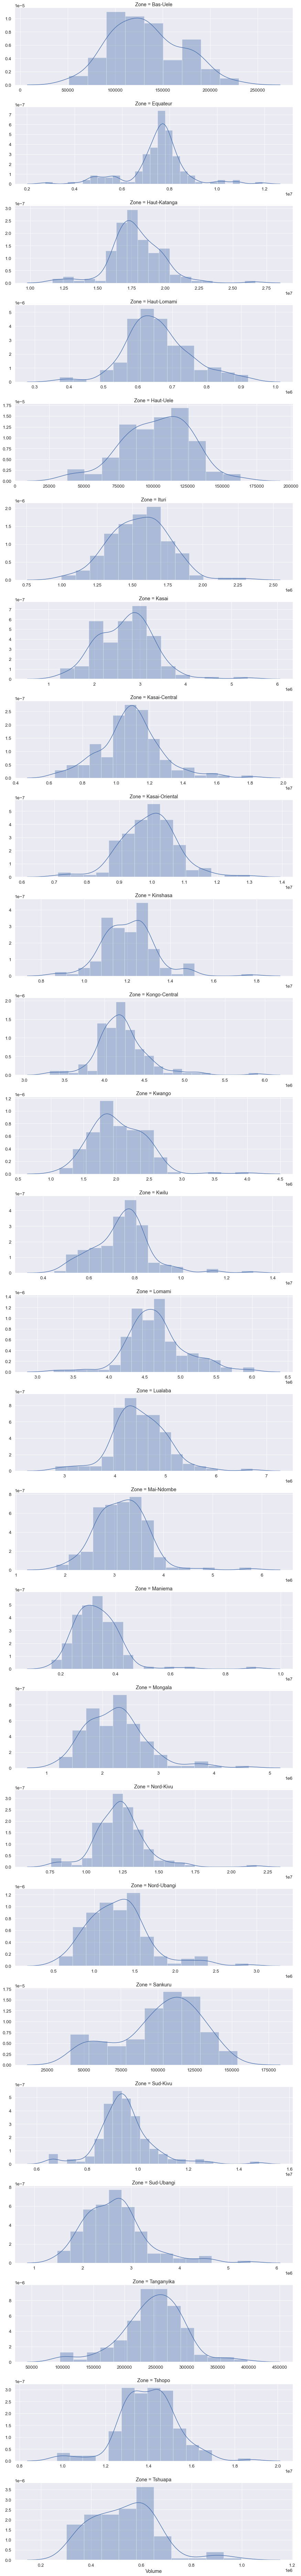

In [102]:
# fig = plt.figure(figsize=(8,5))
# ax = sns.distplot(a=dfp_agg_date_zone[(dfp_agg_date_zone.Zone == 'Kinshasa')]["Volume"])
# ax.set(title = 'Présence',xlabel = "presence",ylabel = '$P(x)$')
# plt.show()

g = sns.FacetGrid(dfp_agg_date_zone, row="Zone",aspect=3,height=4,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(sns.distplot, "Volume")
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

In [103]:
dfp_agg_date_zone.groupby(by=['Zone'],as_index=0).median().sort_values(by='Volume')

Zone      Volume
4        Haut-Uele    104706.5
20         Sankuru    107431.0
0         Bas-Uele    128737.0
23      Tanganyika    249933.0
25         Tshuapa    534246.5
3      Haut-Lomami    649897.5
19     Nord-Ubangi   1275497.5
5            Ituri   1552285.5
11          Kwango   1960785.0
17         Mongala   2206784.5
22      Sud-Ubangi   2647740.5
6            Kasai   2748466.0
15      Mai-Ndombe   3161984.0
16         Maniema   3240309.0
10   Kongo-Central   4195362.0
14         Lualaba   4446823.5
13          Lomami   4625438.0
12           Kwilu   7548283.5
1         Equateur   7643970.5
21        Sud-Kivu   9361157.0
8   Kasai-Oriental   9979257.5
7    Kasai-Central  10914122.0
9         Kinshasa  12063087.5
18       Nord-Kivu  12308689.0
24          Tshopo  14002660.5
2     Haut-Katanga  17652248.0

## Comparison of ref period and obs period

In [104]:
# Date Conversion
dfp_agg_date_zone['Date'] = pd.to_datetime(dfp_agg_date_zone['Date'])
dfp_agg_date_zone['Date_day'] = dfp_agg_date_zone['Date'].dt.weekday

In [105]:
ref_start_date = '2020-02-02'
ref_end_date = '2020-03-18'

mask_base = (dfp_agg_date_zone['Date'] >= ref_start_date) & (dfp_agg_date_zone['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-06-29'

mask_obs = (dfp_agg_date_zone['Date'] >= obs_start_date) & (dfp_agg_date_zone['Date'] <= obs_end_date)

df_ref_p = dfp_agg_date_zone.loc[mask_base]
df_obs_p = dfp_agg_date_zone.loc[mask_obs]

In [106]:
df_ref_p

Date          Zone    Volume  Date_day
52   2020-02-02      Bas-Uele    131502         6
53   2020-02-02      Equateur   7667441         6
54   2020-02-02  Haut-Katanga  16965484         6
55   2020-02-02   Haut-Lomami    647476         6
56   2020-02-02     Haut-Uele    107779         6
...         ...           ...       ...       ...
1165 2020-03-18      Sud-Kivu   9657194         2
1166 2020-03-18    Sud-Ubangi   2490430         2
1167 2020-03-18    Tanganyika    250161         2
1168 2020-03-18        Tshopo  14104136         2
1169 2020-03-18       Tshuapa    533434         2

[1118 rows x 4 columns]

In [107]:
#data aggregation
df_ref_agg_p = df_ref_p.groupby(by=['Zone'],as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg_p.drop('Date_day',inplace=True,axis = 1)

df_obs_agg_p = df_obs_p.groupby(by=['Zone'],as_index=0).median().sort_values(by='Volume',ascending=0)
# df_obs_agg_p.drop('Date_day',inplace=True,axis = 1)


df_merged_agg_p = pd.merge(df_ref_agg_p,df_obs_agg_p,left_on=['Zone'],right_on=['Zone'])
df_merged_agg_p['deltaVolume'] = (df_merged_agg_p.Volume_y - df_merged_agg_p.Volume_x )/df_merged_agg_p.Volume_x*100
df_merged_agg_p = df_merged_agg_p.sort_values(by='deltaVolume')
df_merged_agg_p

Zone  Volume_x  Date_day_x  Volume_y  Date_day_y  deltaVolume
23        Bas-Uele    175894           3    114489           3   -34.910230
12         Maniema   3897740           3   2941604           3   -24.530523
17          Kwango   2369912           3   1845712           3   -22.118965
21         Tshuapa    613746           3    479966           3   -21.797291
14           Kasai   3122166           3   2453093           3   -21.429770
24       Haut-Uele    119605           3     94401           3   -21.072698
19     Nord-Ubangi   1409286           3   1161383           3   -17.590681
13      Mai-Ndombe   3526014           3   2925731           3   -17.024408
15      Sud-Ubangi   2809313           3   2355259           3   -16.162457
16         Mongala   2371043           3   1995809           3   -15.825694
25         Sankuru    117760           3     99749           3   -15.294667
22      Tanganyika    275472           3    238315           3   -13.488485
9          Lualaba   4755973           3   4285147           3    -9.899678
3         Kinshasa  12636714           3  11521775           3    -8.823014
18           Ituri   1634635           3   1507054           3    -7.804862
0     Haut-Katanga  18584498           3  17233529           3    -7.269333
5   Kasai-Oriental  10382846           3   9658793           3    -6.973550
2        Nord-Kivu  12711889           3  11965184           3    -5.874068
1           Tshopo  14415068           3  13627077           3    -5.466440
4    Kasai-Central  11060979           3  10483868           3    -5.217540
20     Haut-Lomami    663933           3    630339           3    -5.059848
6         Sud-Kivu   9657194           3   9267938           3    -4.030736
11   Kongo-Central   4268152           3   4137875           3    -3.052305
7         Equateur   7748208           3   7547103           3    -2.595503
8            Kwilu   7624908           3   7455079           3    -2.227292
10          Lomami   4556906           3   4648198           3     2.003377

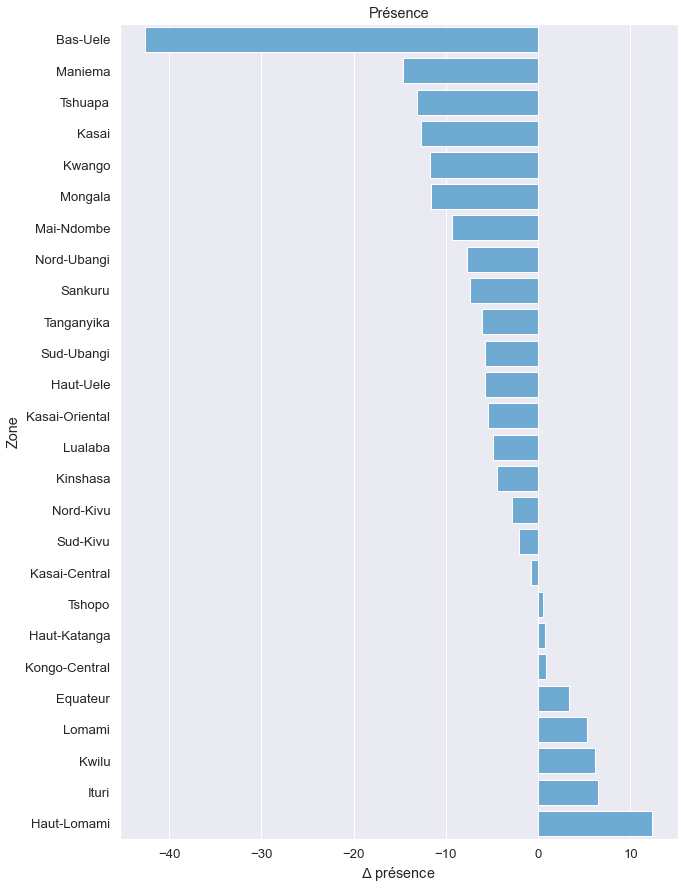

In [77]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Zone", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg_p.sort_values(by='deltaVolume'), orient = 'h')
ax.set(title = 'Présence',xlabel = '$\Delta$ présence')
plt.show()

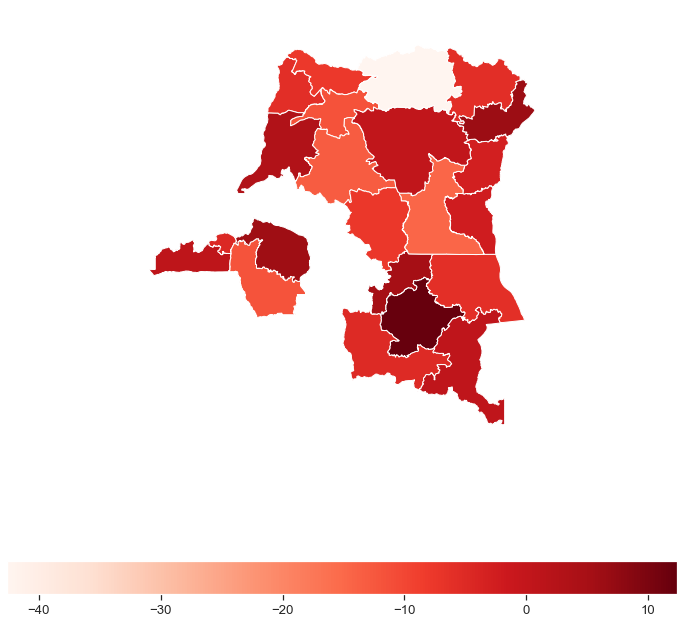

In [78]:
merged_agg_out = zone_gd.merge(df_merged_agg_p,left_on = 'PROVINCE', right_on = 'Zone' )
gpl.choropleth(
    merged_agg_out, hue=merged_agg_out['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

### Presence trends By Provinces

In [79]:
df_ref_agg_date_day = df_ref_p.groupby(by=['Date','Zone','Date_day'],as_index=0).sum().groupby(by=['Zone','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Zone == 'Kinshasa']

Zone  Date_day     Volume
63  Kinshasa         0  8893147.0
64  Kinshasa         1  9152189.0
65  Kinshasa         2  9413726.5
66  Kinshasa         3  9134572.0
67  Kinshasa         4  9436364.0
68  Kinshasa         5  9472602.0
69  Kinshasa         6  9243871.0

In [80]:
df_obs_agg_date_dest_dd = df_obs_p.groupby(by=['Date','Zone','Date_day'],as_index=0).sum()
df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Zone == 'Kinshasa']

Date      Zone  Date_day    Volume
9    2020-03-19  Kinshasa         3   8581918
35   2020-03-20  Kinshasa         4   8401465
61   2020-03-21  Kinshasa         5   9275254
87   2020-03-22  Kinshasa         6  11418548
113  2020-03-23  Kinshasa         0   6189726
...         ...       ...       ...       ...
2505 2020-06-25  Kinshasa         3   8517057
2531 2020-06-26  Kinshasa         4   9446418
2557 2020-06-27  Kinshasa         5   7472078
2583 2020-06-28  Kinshasa         6   9045081
2609 2020-06-29  Kinshasa         0   8555117

[101 rows x 4 columns]

In [81]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Zone','Date_day'],right_on=['Zone','Date_day']).sort_values(by='Date')
df_trend['deltaV'] = (df_trend['Volume_x'] - df_trend['Volume_y'])/df_trend['Volume_y']*100
# df_trend = df_trend[df_trend.Destination == 'Kinshasa']
df_trend

Date            Zone  Date_day  Volume_x    Volume_y     deltaV
0    2020-03-19        Bas-Uele         3     83311     97606.0 -14.645616
120  2020-03-19  Kasai-Oriental         3   7336975   7728277.0  -5.063250
60   2020-03-19       Haut-Uele         3     42224     43413.5  -2.739931
75   2020-03-19           Ituri         3    800997    866600.0  -7.570159
375  2020-03-19         Tshuapa         3    287757    290922.0  -1.087920
...         ...             ...       ...       ...         ...        ...
1567 2020-06-29     Haut-Lomami         0    448538    337815.5  32.776027
1552 2020-06-29    Haut-Katanga         0  10359555  10722007.5  -3.380454
1537 2020-06-29        Equateur         0   3756624   5191925.0 -27.644872
1732 2020-06-29         Lualaba         0   2676740   2745104.0  -2.490397
1642 2020-06-29  Kasai-Oriental         0   6766520   7784251.5 -13.074237

[2626 rows x 6 columns]

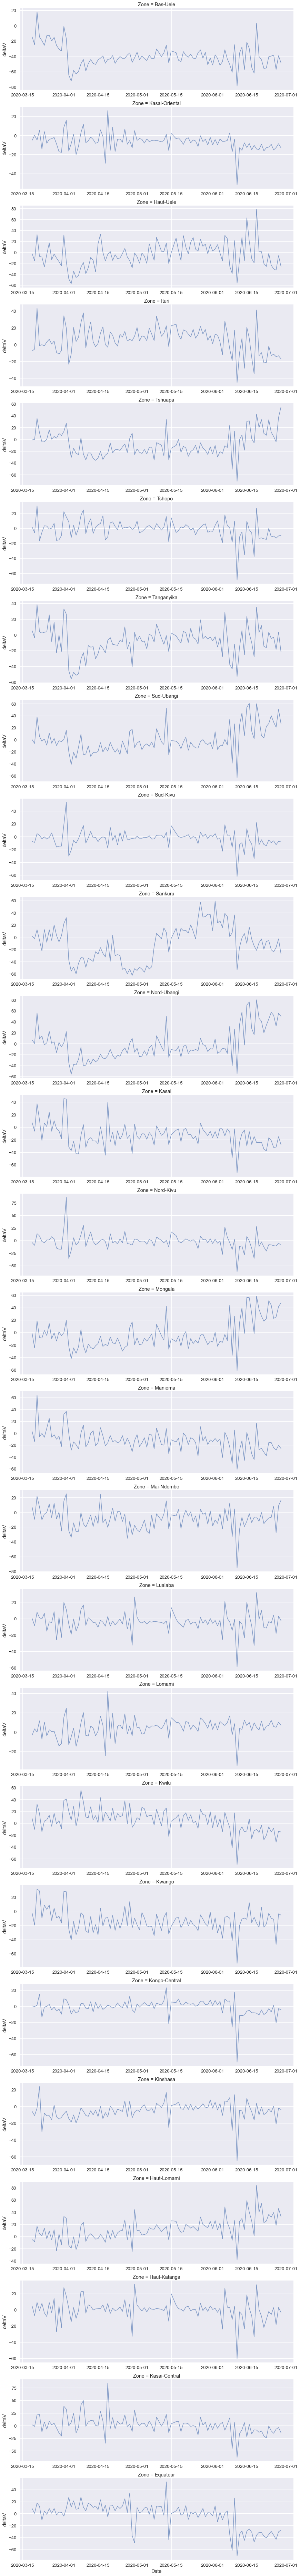

In [82]:
g = sns.FacetGrid(df_trend, row="Zone",aspect=3,height=4,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

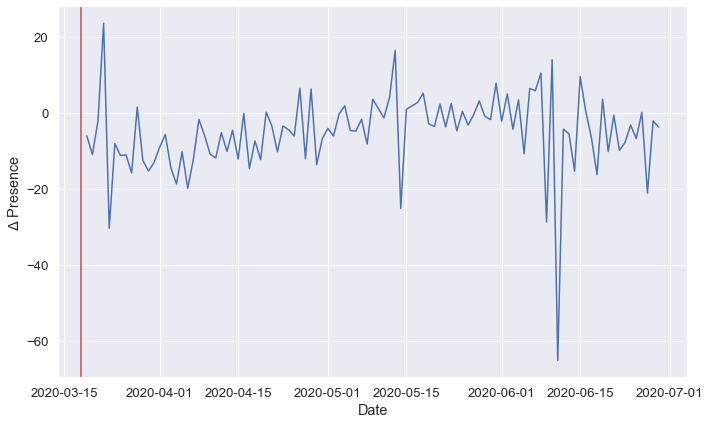

In [83]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Date',y='deltaV',data=df_trend[df_trend.Zone == 'Kinshasa'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set(ylabel = '$\Delta$ Presence')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()